In [43]:
import pandas as pd
import matplotlib.pyplot as plt

albumi = pd.read_csv('tabela.csv')
pd.options.display.max_rows = 15

%matplotlib inline

pd.set_option('display.mpl_style', 'default') 
plt.rcParams['figure.figsize'] = (15, 5)

Zajete podatke sem zbral v spodnji tabeli. 

In [4]:
albumi

,naslov,avtor,ocena_kritikov,leto,zanr,ocena_ljudi
0,Ten Freedom Summers,Wadada Leo Smith,99,2012,['Jazz'],5.0
1,SMiLE,Brian Wilson,97,2004,"['Rock', 'Pop']",8.0
2,Van Lear Rose,Loretta Lynn,97,2004,['Country'],8.7
3,To Pimp A Butterfly,Kendrick Lamar,96,2015,['Rap'],9.0
4,Histoire de Melody Nelson,Serge Gainsbourg,96,2009,"['Rock', 'Pop']",8.7
5,Stankonia,Outkast,95,2000,['Rap'],8.9
...,...,...,...,...,...,...
1374,Parallax,Atlas Sound,82,2011,"['Pop/Rock', 'Alternative/Indie', 'Rock', 'Alt...",8.5
1375,Jet Plane And Oxbow,Shearwater,82,2016,"['Pop/Rock', 'Indie/Alternative']",7.6
1376,Lodestar,Shirley Collins,82,2016,['Folk'],8.4


Svojim podatkom bom dodal še en stolpec 'razlika'. V njem bom izračunal razliko med oceno kritikov in poslušalcev. Na ta način bom kasneje lahko primerjal, pri katerih albumih je prišlo do največjih razlik. 

In [28]:
albumi['razlika'] = albumi['ocena_kritikov'] - albumi['ocena_ljudi'] * 10
albumi[albumi.razlika > 30]

,naslov,avtor,ocena_kritikov,leto,zanr,ocena_ljudi,razlika
0,Ten Freedom Summers,Wadada Leo Smith,99,2012,['Jazz'],5.0,49.0
13,My Dusty Road,Woody Guthrie,93,2009,"['Folk', 'Singer-Songwriter']",5.0,43.0
59,The Fade in Time,Sam Lee,89,2015,['Folk'],5.1,38.0
72,From Kinshasa,Mbongwana Star,88,2015,['International'],5.2,36.0
104,Upland Stories,Robbie Fulks,87,2016,"['Country', 'Folk', 'Pop/Rock']",3.7,50.0
254,Eric Bachmann,Eric Bachmann,81,2016,"['Pop/Rock', 'Alternative/Indie', 'Rock', 'Ind...",4.6,35.0
865,Without a Net,Wayne Shorter,86,2013,['Jazz'],5.3,33.0
1199,The Narrows,Grant-Lee Philips,83,2016,"['Americana', 'Pop/Rock', 'Adult', 'Alternativ...",4.0,43.0


Sedaj lahko na hitro pogledamo koliko albumov so kritiki ocenili z višjo oceno kot poslušalci in kakšna je bila povprečna razlika obeh ocen. 

In [17]:
len(albumi[albumi.razlika > 0])

546

In [16]:
round(sum(abs(albumi['razlika'])) / 1380, 2)

5.21

Oglejmo si povprečno oceno poslušalcev po letih in prikažimo to v grafu.

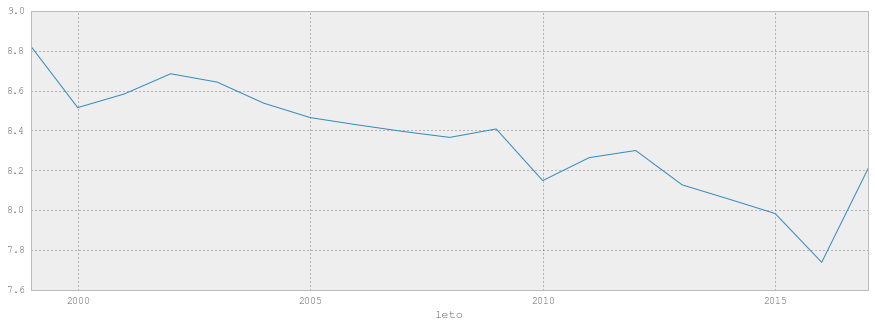

In [29]:
albumi_po_letih = albumi.groupby('leto')
albumi_po_letih['ocena_ljudi'].mean().plot()

Da bomo preverili verodostojnost teh podatkov poglejmo še koliko albumov je bilo posnetih v posameznem letu. 

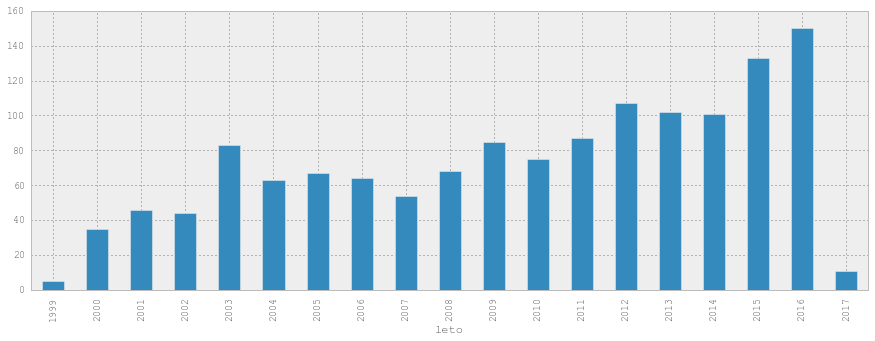

In [30]:
albumi_po_letih.count()['naslov'].plot(kind='bar')

Iz zgornjega grafa vidimo, da je lahko visoka ocena albumov iz začetka tisočletja povezana tudi s tem, da je v zajeti bazi podatkov majhno število albumov iz tega obdobja.

Oglejmo si najbolj popularne avtorje (tiste z največ albumi v naši podatkovni bazi).

In [44]:
albumi_po_avtorjih = albumi.groupby('avtor')
albumi_po_avtorjih.count()['naslov'].sort_values(ascending=False)[:15]

avtor
Spoon                          6
Low                            6
Sleater-Kinney                 5
Nas                            5
Various Artists                5
Bob Dylan                      5
Kanye West                     4
Sufjan Stevens                 4
Mount Eerie                    4
LCD Soundsystem                4
Thee Oh Sees                   4
Miranda Lambert                4
Godspeed You! Black Emperor    4
Elbow                          4
The Dillinger Escape Plan      4
Name: naslov, dtype: int64